# Input-output properties cells

In [1]:
import os
# from google.colab import drive

In [2]:
# drive.mount('/content/gdrive')

In [3]:
# !pip install neuron
# !pip install netpyne
# !pip install bluepysnap
# !pip install h5py

In [4]:
# os.chdir('/content/gdrive/MyDrive/CA1_netpyne/sim/')

In [5]:
# !nrnivmodl modfiles
!nrnivmodl mod

/home/fernando/CA1_netpyne/sim
Mod files: "mod/cacummb.mod" "mod/cacumm.mod" "mod/cagk.mod" "mod/cal2.mod" "mod/can2.mod" "mod/cat.mod" "mod/DetAMPANMDA.mod" "mod/DetGABAAB.mod" "mod/h.mod" "mod/kadist.mod" "mod/kaprox.mod" "mod/kca.mod" "mod/kd2.mod" "mod/kdb.mod" "mod/kdrbca1.mod" "mod/kdrca1.mod" "mod/kmb.mod" "mod/na3n.mod" "mod/naxn.mod" "mod/ProbAMPANMDA_EMS.mod" "mod/ProbGABAAB_EMS.mod" "mod/vecevent.mod"

COBJS=''
 -> Compiling mod_func.c
gcc -O2   -I.   -I/home/fernando/anaconda3/envs/p37/lib/python3.7/site-packages/neuron/.data/include  -I/nrnwheel/openmpi/include -fPIC -c mod_func.c -o mod_func.o
 => LINKING shared library ./libnrnmech.so
g++ -O2 -DVERSION_INFO='8.0.0' -std=c++11 -shared -fPIC  -I /home/fernando/anaconda3/envs/p37/lib/python3.7/site-packages/neuron/.data/include -o ./libnrnmech.so -Wl,-soname,libnrnmech.so \
  ./mod_func.o ./cacummb.o ./cacumm.o ./cagk.o ./cal2.o ./can2.o ./cat.o ./DetAMPANMDA.o ./DetGABAAB.o ./h.o ./kadist.o ./kaprox.o ./kca.o ./kd2.o ./kdb

In [6]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
CircuitPath = '/home/fernando/CA1_netpyne/info/data-bbp/20191017/'
# CircuitPath = '/content/gdrive/MyDrive/CA1_netpyne/info/data-bbp/20191017/'
BioName = CircuitPath + 'bioname/'
Atlas = CircuitPath + 'atlas/'
MorphologyPath = CircuitPath + 'morphologies/swc/'
CellLibraryFile = CircuitPath + 'sonata/nodes/nodes_hippocampus.h5'
METypePath = CircuitPath + 'emodels/20190402/hoc/'
MEComboInfoFile = CircuitPath + 'emodels/20190402/mecombo_emodel.tsv'
UserTargetFile = CircuitPath + 'user.target'
StartTargetFile = CircuitPath + 'start.target'

In [8]:
from bluepysnap import Circuit
from bluepysnap.bbp import Cell
circuit_path = CircuitPath + 'circuit_config.json'
circuit = Circuit(circuit_path)
cells = circuit.nodes["hippocampus_neurons"]
cells_projections = circuit.nodes["hippocampus_projections"]
nodesinfo = cells.get()
nodesinfo_projections = cells_projections.get()

In [9]:
nodesinfo

,etype,layer,model_template,model_type,morph_class,morphology,mtype,region,rotation_angle_xaxis,rotation_angle_yaxis,rotation_angle_zaxis,synapse_class,x,y,z,@dynamics:holding_current,@dynamics:threshold_current
0,bAC,SLM,hoc:CA1_int_bAC_011127HP1_2019032911561,biophysical,INT,011127HP1_-_Scale_x1.000_y0.850_z1.000,SLM_PPA,mc5;SLM,-0.000000,0.306704,-0.000000,INH,409.446689,525.218483,1074.146619,0.028962,0.224609
1,bAC,SLM,hoc:CA1_int_bAC_011127HP1_2019032911561,biophysical,INT,011127HP1_-_Scale_x1.000_y0.850_z1.000,SLM_PPA,mc3;SLM,-3.141593,1.051681,-3.141593,INH,692.961402,511.187277,573.179832,0.028962,0.224609
2,bAC,SLM,hoc:CA1_int_bAC_011127HP1_2019032911561,biophysical,INT,011127HP1_-_Scale_x1.000_y0.850_z1.000,SLM_PPA,mc6;SLM,-3.141593,1.393882,-3.141593,INH,624.142630,520.641475,976.924721,0.028962,0.224609
3,cAC,SR,hoc:CA1_int_cAC_990611HP2_2019032816214,biophysical,INT,990611HP2,SR_SCA,mc5;SR,-3.141593,0.347655,-3.141593,INH,430.543380,411.999965,1180.185218,0.005140,0.341797
4,cAC,SR,hoc:CA1_int_cAC_990611HP2_2019032816214,biophysical,INT,990611HP2_-_Scale_x1.000_y1.050_z1.000,SR_SCA,mc5;SR,-0.000000,0.137277,-0.000000,INH,427.936977,302.239247,1013.453517,0.004947,0.341797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18193,cNAC,SO,hoc:CA1_int_cNAC_970717D_2019030718251,biophysical,INT,980120A,SO_BP,mc3;SO,-3.141593,1.303866,-3.141593,INH,771.381002,37.274531,231.992286,-0.011643,0.302734
18194,cNAC,SO,hoc:CA1_int_cNAC_970911C_2019030512040,biophysical,INT,980120A_-_Scale_x1.000_y1.150_z1.000,SO_BP,mc3;SO,0.000000,-1.070015,0.000000,INH,666.970306,58.551145,396.539067,-0.044198,0.449219
18195,cNAC,SO,hoc:CA1_int_cNAC_970911C_2019030512040,biophysical,INT,980120A_-_Scale_x1.000_y0.850_z1.000_-_Clone_0,SO_BP,mc0;SO,-3.141593,1.267531,-3.141593,INH,505.811537,130.131875,182.700052,-0.044335,0.439453
18196,cNAC,SO,hoc:CA1_int_cNAC_990111HP2_2019032915570,biophysical,INT,980120A_-_Scale_x1.000_y1.150_z1.000,SO_BP,mc4;SO,-0.000000,0.815231,-0.000000,INH,-68.542249,57.960736,940.564725,-0.001224,0.371094


In [10]:
most_central_10_SP_PC = [11617, 6393, 6789, 6243, 13513, 14311, 9397, 3699, 12245, 12001]
most_central_10_SP_PC = most_central_10_SP_PC - np.ones_like(most_central_10_SP_PC)

# SO_OLM_cells = [18039, 18040, 18041, 18042, 18043, 18044, 18045, 18046, 18047, 18048, 18049, 18050, 18051, 18052, 18053, 18054, 18055, 18056, 18057, 18058, 18059, 18060, 18061, 18062, 18063, 18064, 18065, 18066, 18067, 18068, 18069, 18070, 18071, 18072, 18073, 18074, 18075, 18076, 18077, 18078, 18079, 18080, 18081, 18082, 18083, 18084, 18085, 18086, 18087, 18088, 18089, 18090, 18091, 18092, 18093, 18094, 18095, 18096, 18097, 18098, 18099, 18100, 18101, 18102, 18103, 18104, 18105, 18106, 18107, 18108, 18109, 18110, 18111, 18112, 18113, 18114, 18115, 18116, 18117, 18118, 18119, 18120, 18121, 18122, 18123, 18124, 18125, 18126]
# SO_OLM_cells = SO_OLM_cells - np.ones_like(SO_OLM_cells)
# most_central_10_SP_PC = range(18198)

for gid in most_central_10_SP_PC:
    MorphoName = nodesinfo['morphology'][gid] + '.swc'
    hocName = METypePath + nodesinfo['model_template'][gid][4:] + '.hoc'
    cellName = nodesinfo['model_template'][gid][4:]  
    mcName = nodesinfo['region'][gid][:3]  
    layerName = nodesinfo['region'][gid][4:]  
    print('%s %s %s \n       %s' % (mcName,layerName,cellName,MorphoName))

mc2 SP CA1_pyr_cACpyr_oh140807_A0_idJ_2019032814272 
       dend-mpg141216_A_idA_axon-mpg141017_a1-2_idC_-_Scale_x1.000_y0.900_z1.000_-_Clone_4.swc
mc2 SP CA1_pyr_cACpyr_mpg141217_A_idB_2019030511280 
       mpg141017_a1-2_idC_-_Scale_x1.000_y0.850_z1.000_-_Clone_11.swc
mc2 SP CA1_pyr_cACpyr_oh140807_A0_idB_2019030510521 
       dend-mpg141216_A_idA_axon-mpg141017_a1-2_idC_-_Scale_x1.000_y0.850_z1.000_-_Clone_7.swc
mc2 SP CA1_pyr_cACpyr_mpg141017_a1_2_idC_2019032814340 
       dend-mpg141216_A_idA_axon-mpg141017_a1-2_idC_-_Scale_x1.000_y0.900_z1.000_-_Clone_12.swc
mc2 SP CA1_pyr_cACpyr_mpg141017_a1_2_idC_2019032814340 
       dend-oh140807_A0_idF_axon-mpg141017_a1-2_idC_-_Scale_x1.000_y0.850_z1.000_-_Clone_12.swc
mc2 SP CA1_pyr_cACpyr_oh140807_A0_idF_2019030511545 
       dend-mpg141216_A_idA_axon-mpg141017_a1-2_idC_-_Scale_x1.000_y0.950_z1.000_-_Clone_4.swc
mc2 SP CA1_pyr_cACpyr_oh140807_A0_idJ_2019032814272 
       dend-oh140521_B0_Rat_idC_axon-mpg141017_a1-2_idC_-_Scale_x1.000_y0.85

In [11]:
print('hoclist size =',np.size(list(cells.property_values(Cell.MODEL_TEMPLATE))))
print('Morpholist size =',np.size(list(cells.property_values(Cell.MORPHOLOGY))))

hoclist size = 36
Morpholist size = 646


# Exploring the Lists

In [12]:
hoclist = list(cells.property_values(Cell.MODEL_TEMPLATE))
Morpholist = list(cells.property_values(Cell.MORPHOLOGY))
Mtypelist = list(cells.property_values(Cell.MTYPE))

In [13]:
Mtypelist

['SLM_PPA',
 'SO_BP',
 'SO_OLM',
 'SP_CCKBC',
 'SR_SCA',
 'SP_AA',
 'SP_Ivy',
 'SP_PC',
 'SP_BS',
 'SP_PVBC',
 'SO_BS',
 'SO_Tri']

In [14]:
gid = 0
print (nodesinfo['model_template'][gid],nodesinfo['morphology'][gid])
hocName = nodesinfo['model_template'][gid].split('_')[3]
MorphoName = nodesinfo['morphology'][gid].split('_')[0]
print (hocName,MorphoName)

hoc:CA1_int_bAC_011127HP1_2019032911561 011127HP1_-_Scale_x1.000_y0.850_z1.000
011127HP1 011127HP1


## Netpyne

In [15]:
from netpyne import specs, sim   

# Network parameters
netParams = specs.NetParams()  # object of class NetParams to store the network parameters

In [16]:
%matplotlib inline

In [17]:
## cfg  
cfg = specs.SimConfig()					            # object of class SimConfig to store simulation configuration
cfg.duration = 1600.0 						            # Duration of the simulation, in ms
cfg.dt = 0.01								                # Internal integration timestep to use
cfg.verbose = False							                # Show detailed messages 
cfg.recordTraces = {'V_soma':{'sec':'soma','loc':0.5,'var':'v'}}  # Dict with traces to record
cfg.recordStep = 0.01 			
cfg.printRunTime = 0.1 # in sec			

cfg.seeds = {'conn': 1333, 'stim': 1333, 'loc': 1333} 
cfg.hParams = {'celsius': 34, 'v_init': -70}  
cfg.verbose = False
cfg.createNEURONObj = True
cfg.createPyStruct = True  
#------------------------------------------------------------------------------
# Saving
#------------------------------------------------------------------------------
cfg.filename = 'model_output'  			# Set file output name
cfg.savePickle = False         	## Save pkl file
cfg.saveJson = True	           	## Save json file
cfg.saveDataInclude = ['simData'] ## 'simData' , 'simConfig', 'netParams'
cfg.backupCfgFile = None 		##  
cfg.gatherOnlySimData = False	##  
cfg.saveCellSecs = False			
cfg.saveCellConns = True	


cfg.analysis['plotTraces'] = {'include': [0,1,2,3,4,5,6,7,8,9], 'timeRange': [300,1600], 'saveFig': True, 'showFig': True, 'figSize':(12,4)} # Plot recorded traces for this list of cells
# cfg.analysis['plotShape'] = {'includePre': [0],'includePre': [0], 'saveFig': True, 'showFig': True, 'figSize':(12,12)}


In [18]:
most_central_10_SP_PC

array([11616,  6392,  6788,  6242, 13512, 14310,  9396,  3698, 12244,
       12000])

In [19]:
number = 0
# for gid in [14444,14445]:
for gid in most_central_10_SP_PC:
    number += 1
    MorphoName = nodesinfo['morphology'][gid] + '.swc'
    hocName = nodesinfo['model_template'][gid][4:]  
    cellName = nodesinfo['mtype'][gid] + '_' + nodesinfo['etype'][gid] + '_' + nodesinfo['region'][gid][:3]  + '_' +   str(number)
    
    cellRule = netParams.importCellParams(label=cellName, somaAtOrigin=False,
        conds={'cellType': cellName, 'cellModel': 'HH_full'},
        fileName='cellwrapper.py',
        cellName='loadCell',
        cellInstance = True,
        cellArgs={'hocName': hocName, 'MorphoName': MorphoName})
    netParams.renameCellParamsSec(label=cellName, oldSec='soma_0', newSec='soma')
    
    for secname2 in netParams.cellParams[cellName]['secLists'].keys():
        if 'soma_0' in netParams.cellParams[cellName]['secLists'][secname2]:
#             print(cellName,secname2,netParams.cellParams[cellName]['secLists'][secname2][0])
            netParams.cellParams[cellName]['secLists'][secname2][0] = 'soma'
    
    netParams.popParams[cellName] = {'cellType': cellName, 'numCells': 1, 'cellModel': 'HH_full'}

In [20]:
# netParams.popParams['SP_PC_cACpyr_mc2'] = {'cellType': 'SP_PC_cACpyr_mc2', 'numCells': 1, 'cellModel': 'HH_full'}
# netParams.popParams['SP_PC_cACpyr_mc6'] = {'cellType': 'SP_PC_cACpyr_mc6', 'numCells': 1, 'cellModel': 'HH_full'}

In [21]:
# create custom list of spike times
spkTimes = [500,550,600,650,700,750,800,850,1400]

netParams.popParams['presyn'] = {'cellModel': 'VecStim', 'numCells': 1, 'spkTimes': spkTimes}  # VecStim with spike times

In [22]:
# netParams.cellParams[cellName]
netParams.cellParams.keys()

odict_keys(['SP_PC_cACpyr_mc2_1', 'SP_PC_cACpyr_mc2_2', 'SP_PC_cACpyr_mc2_3', 'SP_PC_cACpyr_mc2_4', 'SP_PC_cACpyr_mc2_5', 'SP_PC_cACpyr_mc2_6', 'SP_PC_cACpyr_mc2_7', 'SP_PC_cACpyr_mc2_8', 'SP_PC_cACpyr_mc2_9', 'SP_PC_cACpyr_mc2_10'])

In [23]:
netParams.popParams.keys()

odict_keys(['SP_PC_cACpyr_mc2_1', 'SP_PC_cACpyr_mc2_2', 'SP_PC_cACpyr_mc2_3', 'SP_PC_cACpyr_mc2_4', 'SP_PC_cACpyr_mc2_5', 'SP_PC_cACpyr_mc2_6', 'SP_PC_cACpyr_mc2_7', 'SP_PC_cACpyr_mc2_8', 'SP_PC_cACpyr_mc2_9', 'SP_PC_cACpyr_mc2_10', 'presyn'])

In [24]:
# netParams.synMechParams['SP_PC:SP_PC'] = {'mod': 'DetAMPANMDA'}

netParams.synMechParams['SP_PC:SP_PC'] = {'mod': 'DetAMPANMDA',
                                          'Dep': 671.0,
                                          'Fac': 17.0,
                                          'NMDA_ratio': 1.22,
                                          'Use': 0.5,
                                          'tau_d_AMPA': 3.0,
                                          'tau_d_NMDA': 148.5}

# netParams.synMechParams['PC-PC'] = {'mod': 'DetAMPANMDA','tau_d_AMPA': 3.0,'tau_d_NMDA': 148.5,'Use': 0.5,'Dep': 671.0,'Fac': 17.0, 'NMDA_ratio': 1.22}
                                          
# netParams.stimSourceParams['Input'] = {'type': 'NetStim', 'rate':20, 'start': 600, 'number': 8, 'noise': 0.0}
# netParams.stimSourceParams['Input'] = {'type': 'NetStim', 'interval': 50, 'start': 600}

# netParams.stimTargetParams['Input->SP_PC_cACpyr'] = {'source': 'Input','synMech': 'SP_PC:SP_PC', 'weight': 0.6,'delay': 0.5, 'sec': 'basal', 'loc': 0.5, 'conds': {'pop':'SP_PC_cACpyr_mc2_2'}}

In [25]:
## Cell connectivity rules
netParams.connParams['pre->post'] = { 
        'preConds': {'pop': 'presyn'},
        'postConds': {'pop': ['SP_PC_cACpyr_mc2_1', 'SP_PC_cACpyr_mc2_2', 'SP_PC_cACpyr_mc2_3', 'SP_PC_cACpyr_mc2_4', 'SP_PC_cACpyr_mc2_5', 'SP_PC_cACpyr_mc2_6', 'SP_PC_cACpyr_mc2_7', 'SP_PC_cACpyr_mc2_8', 'SP_PC_cACpyr_mc2_9', 'SP_PC_cACpyr_mc2_10']},
        'sec': 'basal',                  # target postsyn section
        'synMech': 'SP_PC:SP_PC',              # target synaptic mechanism
        'weight': 0.6,                 # synaptic weight
        'delay': 0.5}             # probability of connection

In [26]:
sim.initialize(
    simConfig = cfg, 	
    netParams = netParams)  				# create network object and set cfg and net params
sim.net.createPops()               			# instantiate network populations
sim.net.createCells()              			# instantiate network cells based on defined populations
sim.net.connectCells()            			# create connections between cells based on params
sim.net.addStims() 							# add network stimulation
sim.setupRecording()              			# setup variables to record for each cell (spikes, V traces, etc)


Start time:  2021-09-27 21:02:44.601226

Creating network of 11 cell populations on 1 hosts...
  Number of cells on node 0: 11 
  Done; cell creation time = 1.18 s.
Making connections...
  Number of connections on node 0: 10 
  Done; cell connection time = 0.00 s.
  Number of stims on node 0: 0 
  Done; cell stims creation time = 0.00 s.
Recording 10 traces of 1 types on node 0


{spkt: Vector[16956], spkid: Vector[16957], V_soma: {cell_0: Vector[16958], cell_1: Vector[16959], cell_2: Vector[16960], cell_3: Vector[16961], cell_4: Vector[16962], cell_5: Vector[16963], cell_6: Vector[16964], cell_7: Vector[16965], cell_8: Vector[16966], cell_9: Vector[16967]}, t: Vector[16968], _repr_mimebundle_: {}}

In [27]:
sim.runSim()                      			# run parallel Neuron simulation  

0.0s

Running simulation for 1600.0 ms...
0.1s
0.2s
0.3s
0.4s
0.5s
0.6s
0.7s
0.8s
0.9s
1.0s
1.1s
1.2s
1.3s
1.4s
1.5s
1.6s
  Done; run time = 3449.45 s; real-time ratio: 0.00.



Gathering data...
  Done; gather time = 0.06 s.

Analyzing...
  Cells: 11
  Connections: 10 (0.91 per cell)
  Spikes: 9 (0.51 Hz)
  Simulated time: 1.6 s; 1 workers
  Run time: 3449.45 s
Saving output as model_output.json  ... 
Finished saving!
  Done; saving time = 3.33 s.
Plotting recorded cell traces ... cell


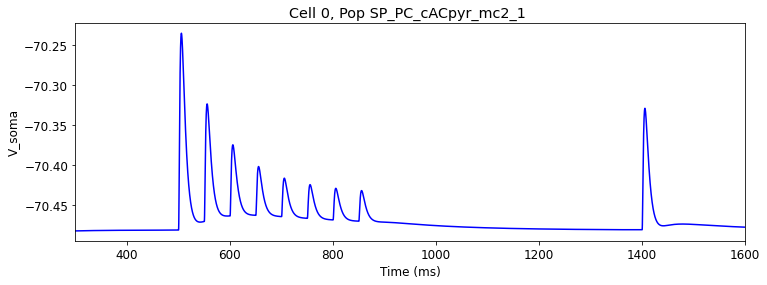

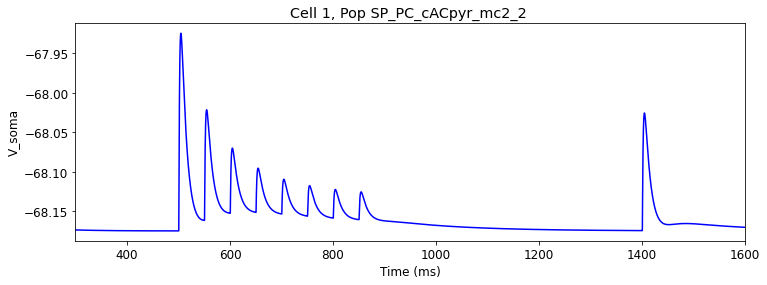

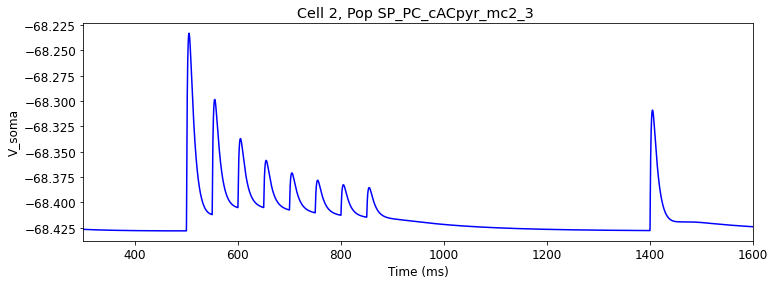

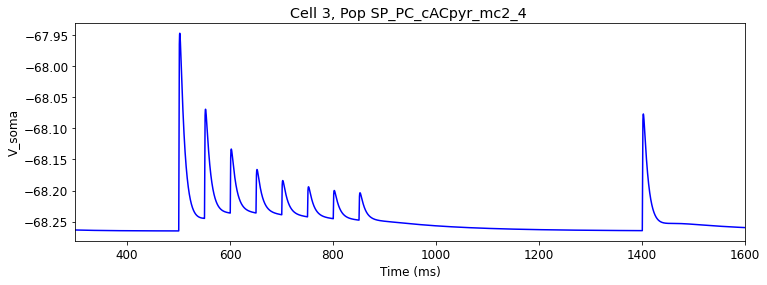

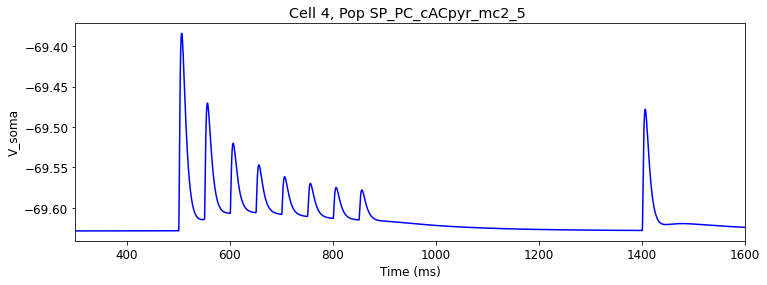

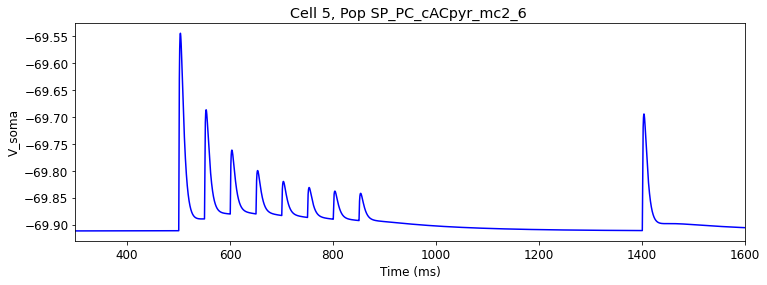

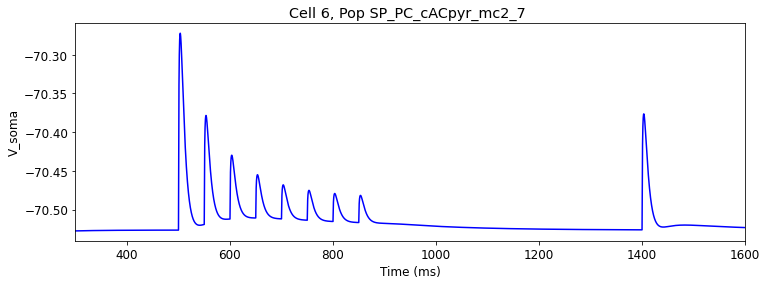

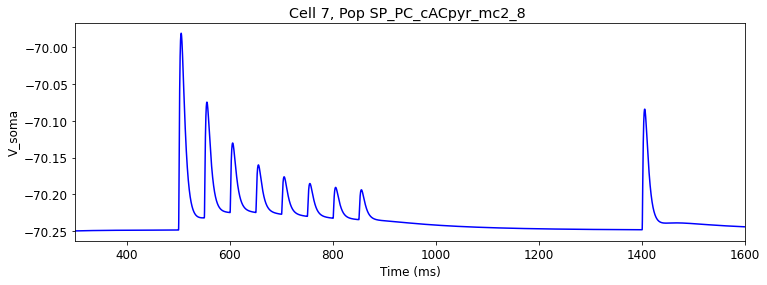

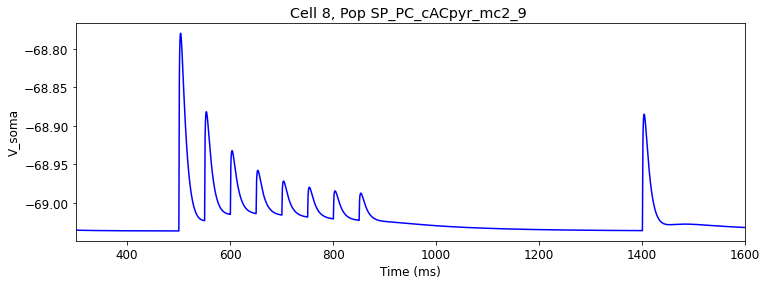

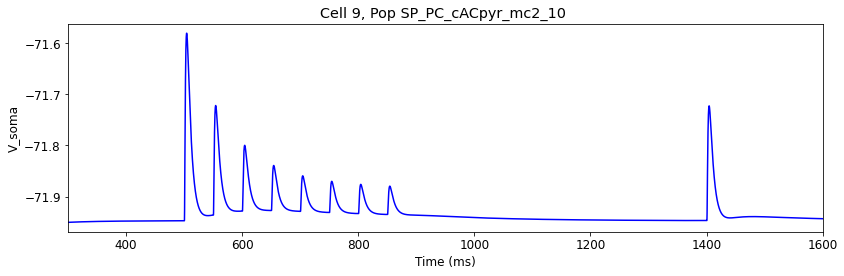

  Done; plotting time = 1.92 s

Total time = 3456.07 s

End time:  2021-09-27 22:00:20.675357


In [28]:
sim.gatherData()                  			# gather spiking data and cell info from each node
sim.saveData()                    			# save params, cell info and sim output to file (pickle,mat,txt,etc)#
sim.analysis.plotData()         			# plot spike raster etc

Plotting raster...


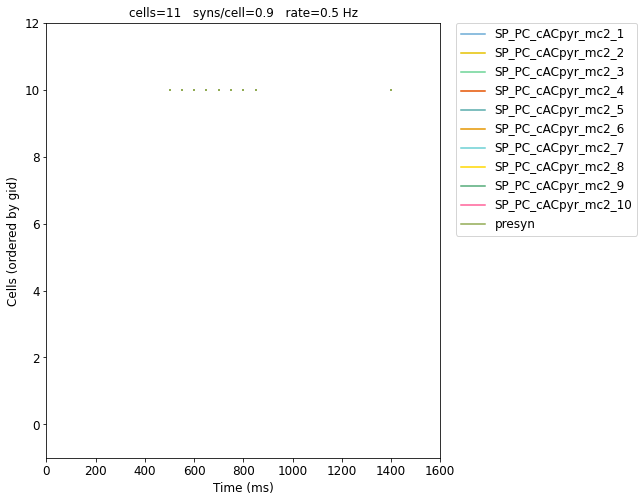

(<Figure size 720x576 with 1 Axes>,
 {'include': ['allCells'],
  'spkts': [500.0, 550.0, 600.0, 650.0, 700.0, 750.0, 800.0, 850.0, 1400.0],
  'spkinds': [10, 10, 10, 10, 10, 10, 10, 10, 10],
  'timeRange': [0, 1600.0]})

In [29]:
sim.analysis.plotRaster()

Plotting recorded cell traces ... trace


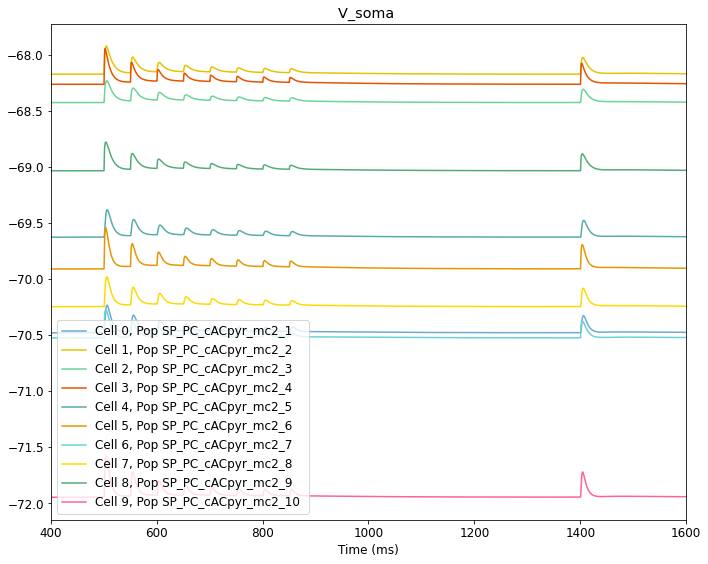

In [30]:
Traces2 = sim.analysis.plotTraces(oneFigPer='trace', overlay=1, timeRange=[400,1600])

(400.0, 1600.0)

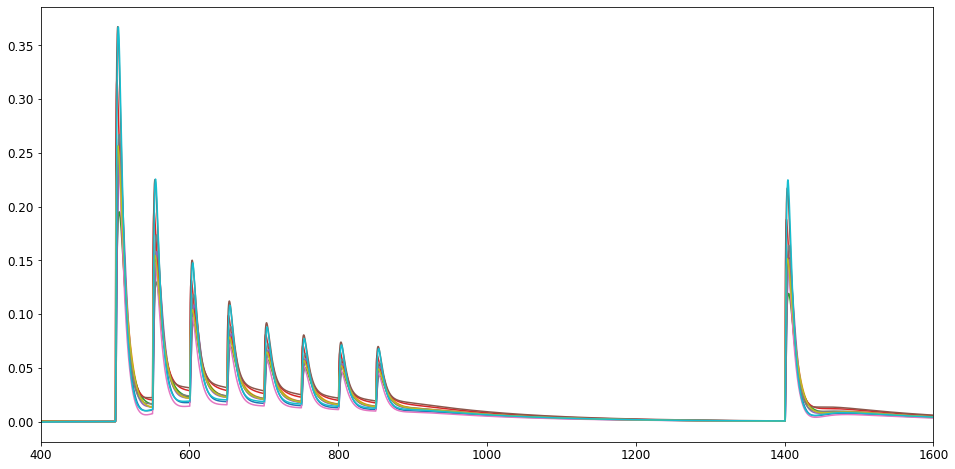

In [38]:
figSize = (16,8)
fig = plt.figure(figsize=figSize)  # Open a new figure
for number in range(10):
    plt.plot(Traces2[1]['tracesData'][number]['t'][1:],Traces2[1]['tracesData'][number]['cell_'+str(number)+'_V_soma']-Traces2[1]['tracesData'][number]['cell_'+str(number)+'_V_soma'][9999])
plt.xlim(400,1600)

In [39]:
for number in range(10):
    print('postGid: ',number)
    print(sim.net.allCells[number]['conns'])

postGid:  0
[{preGid: 10, sec: 'dend_41', loc: 0.5, synMech: 'SP_PC:SP_PC', weight: 0.6, delay: 0.5, label: 'pre->post'}]
postGid:  1
[{preGid: 10, sec: 'dend_27', loc: 0.5, synMech: 'SP_PC:SP_PC', weight: 0.6, delay: 0.5, label: 'pre->post'}]
postGid:  2
[{preGid: 10, sec: 'dend_52', loc: 0.5, synMech: 'SP_PC:SP_PC', weight: 0.6, delay: 0.5, label: 'pre->post'}]
postGid:  3
[{preGid: 10, sec: 'dend_17', loc: 0.5, synMech: 'SP_PC:SP_PC', weight: 0.6, delay: 0.5, label: 'pre->post'}]
postGid:  4
[{preGid: 10, sec: 'dend_23', loc: 0.5, synMech: 'SP_PC:SP_PC', weight: 0.6, delay: 0.5, label: 'pre->post'}]
postGid:  5
[{preGid: 10, sec: 'dend_32', loc: 0.5, synMech: 'SP_PC:SP_PC', weight: 0.6, delay: 0.5, label: 'pre->post'}]
postGid:  6
[{preGid: 10, sec: 'dend_34', loc: 0.5, synMech: 'SP_PC:SP_PC', weight: 0.6, delay: 0.5, label: 'pre->post'}]
postGid:  7
[{preGid: 10, sec: 'dend_39', loc: 0.5, synMech: 'SP_PC:SP_PC', weight: 0.6, delay: 0.5, label: 'pre->post'}]
postGid:  8
[{preGid: 10